In [2]:
# End-to-End Preprocessing with Scikit-learn and imbalanced-learN

# ✅ Install Required Libraries
!pip install -q imbalanced-learn




In [1]:
# ✅ Import Required Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline



In [2]:
# ✅ Load Sample Data: Adult Income Dataset from OpenML
# This dataset contains demographic information and income classification
# We will predict whether income exceeds $50K/yr based on census data
data = fetch_openml("adult", version=2, as_frame=True)
df = data.frame



In [3]:
df.head

<bound method NDFrame.head of        age     workclass  fnlwgt     education  education-num  \
0       25       Private  226802          11th              7   
1       38       Private   89814       HS-grad              9   
2       28     Local-gov  336951    Assoc-acdm             12   
3       44       Private  160323  Some-college             10   
4       18           NaN  103497  Some-college             10   
...    ...           ...     ...           ...            ...   
48837   27       Private  257302    Assoc-acdm             12   
48838   40       Private  154374       HS-grad              9   
48839   58       Private  151910       HS-grad              9   
48840   22       Private  201490       HS-grad              9   
48841   52  Self-emp-inc  287927       HS-grad              9   

           marital-status         occupation relationship   race     sex  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-

In [4]:
df.isna

<bound method DataFrame.isna of        age     workclass  fnlwgt     education  education-num  \
0       25       Private  226802          11th              7   
1       38       Private   89814       HS-grad              9   
2       28     Local-gov  336951    Assoc-acdm             12   
3       44       Private  160323  Some-college             10   
4       18           NaN  103497  Some-college             10   
...    ...           ...     ...           ...            ...   
48837   27       Private  257302    Assoc-acdm             12   
48838   40       Private  154374       HS-grad              9   
48839   58       Private  151910       HS-grad              9   
48840   22       Private  201490       HS-grad              9   
48841   52  Self-emp-inc  287927       HS-grad              9   

           marital-status         occupation relationship   race     sex  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farmin

In [9]:
# Drop missing values for simplicity
df = df.dropna()



In [10]:
df


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
df.isna

<bound method DataFrame.isna of        age     workclass  fnlwgt     education  education-num  \
0       25       Private  226802          11th              7   
1       38       Private   89814       HS-grad              9   
2       28     Local-gov  336951    Assoc-acdm             12   
3       44       Private  160323  Some-college             10   
5       34       Private  198693          10th              6   
...    ...           ...     ...           ...            ...   
48837   27       Private  257302    Assoc-acdm             12   
48838   40       Private  154374       HS-grad              9   
48839   58       Private  151910       HS-grad              9   
48840   22       Private  201490       HS-grad              9   
48841   52  Self-emp-inc  287927       HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married  Machine-op-inspct      Own-child  Black    Male   
1      Married-civ-spouse    Fa

In [12]:
# Separate features and target
X = df.drop("class", axis=1)
y = df["class"]



In [14]:
y

0        <=50K
1        <=50K
2         >50K
3         >50K
5        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: class, Length: 45222, dtype: category
Categories (2, object): ['<=50K', '>50K']

In [15]:
# ✅ Identify Categorical and Numerical Columns
cat_cols = X.select_dtypes(include="category").columns.tolist()
num_cols = X.select_dtypes(include=["float64", "int64"]).columns.tolist()



In [16]:
cat_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [17]:
num_cols

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [18]:
# ✅ Train-Test Split
# We use stratified splitting to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)



In [21]:
# ✅ Preprocessing Pipelines

# Pipeline for Categorical Features:
# 1. Impute missing values using the most frequent value
# 2. One-hot encode the categories
cat_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("encode", OneHotEncoder(handle_unknown="ignore"))
])



In [22]:
# Pipeline for Numerical Features:
# 1. Impute missing values using KNN
# 2. Standard scaling
num_pipeline = Pipeline([
    ("impute", KNNImputer(n_neighbors=3)),
    ("scale", StandardScaler())
])



In [23]:
# Combine both pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ("cat", cat_pipeline, cat_cols),
    ("num", num_pipeline, num_cols)
])



In [24]:
# ✅ Full Pipeline with SMOTE Balancing and Logistic Regression
# Using imbalanced-learn's Pipeline to integrate preprocessing + SMOTE + model
model_pipeline = ImbPipeline(steps=[
    ("preprocess", preprocessor),
    ("balance", SMOTE(random_state=42)),
    ("clf", LogisticRegression(max_iter=1000))
])



In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             45222 non-null  int64   
 1   workclass       45222 non-null  category
 2   fnlwgt          45222 non-null  int64   
 3   education       45222 non-null  category
 4   education-num   45222 non-null  int64   
 5   marital-status  45222 non-null  category
 6   occupation      45222 non-null  category
 7   relationship    45222 non-null  category
 8   race            45222 non-null  category
 9   sex             45222 non-null  category
 10  capital-gain    45222 non-null  int64   
 11  capital-loss    45222 non-null  int64   
 12  hours-per-week  45222 non-null  int64   
 13  native-country  45222 non-null  category
 14  class           45222 non-null  category
dtypes: category(9), int64(6)
memory usage: 2.8 MB


In [26]:
# ✅ Train the Model
model_pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country']),
                                                 ('num',
                                                  Pipeline(steps=[('impute',
                                                                   KNNImputer(n_neighbors=3)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['age', 'fnlwgt',
                                                   'education-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week'])])),
                ('balance', SMOTE(random_state=42)),
                ('clf', LogisticRegression(max_iter=1000))])

In [27]:

# # 📊 Exploratory Data Analysis (EDA)

## 💡 Dataset Overview
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (45222, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [28]:

## 🧮 Basic Statistics
print(df.describe(include='all'))



                 age workclass        fnlwgt education  education-num  \
count   45222.000000     45222  4.522200e+04     45222   45222.000000   
unique           NaN         7           NaN        16            NaN   
top              NaN   Private           NaN   HS-grad            NaN   
freq             NaN     33307           NaN     14783            NaN   
mean       38.547941       NaN  1.897347e+05       NaN      10.118460   
std        13.217870       NaN  1.056392e+05       NaN       2.552881   
min        17.000000       NaN  1.349200e+04       NaN       1.000000   
25%        28.000000       NaN  1.173882e+05       NaN       9.000000   
50%        37.000000       NaN  1.783160e+05       NaN      10.000000   
75%        47.000000       NaN  2.379260e+05       NaN      13.000000   
max        90.000000       NaN  1.490400e+06       NaN      16.000000   

            marital-status    occupation relationship   race    sex  \
count                45222         45222        4522

In [29]:
## 📌 Missing Values
print("Missing values per column:")
print(df.isnull().sum())



Missing values per column:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

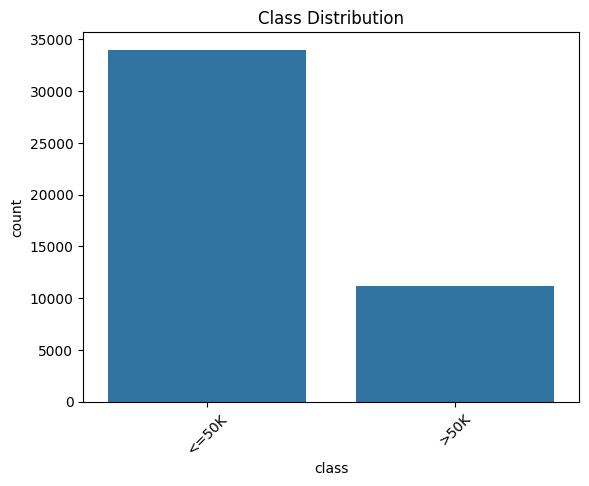

In [32]:
## 🏷️ Class Distribution
sns.countplot(data=df, x="class")
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.show()



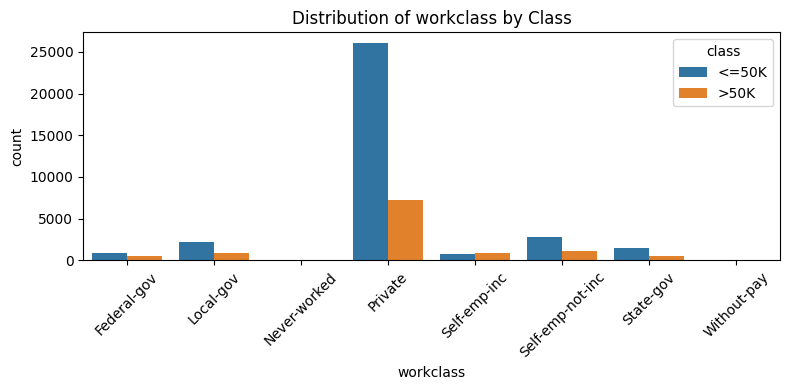

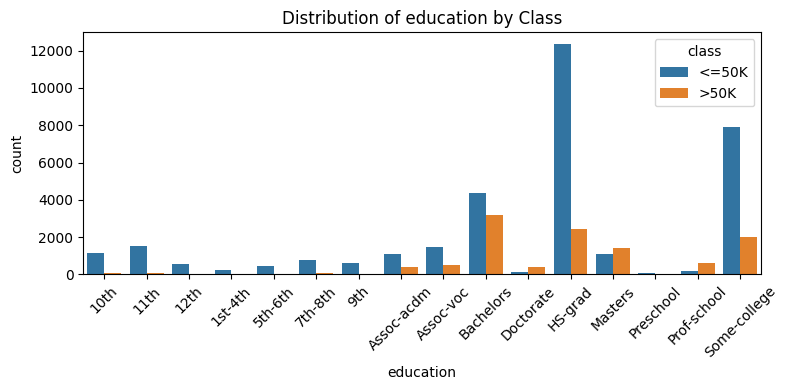

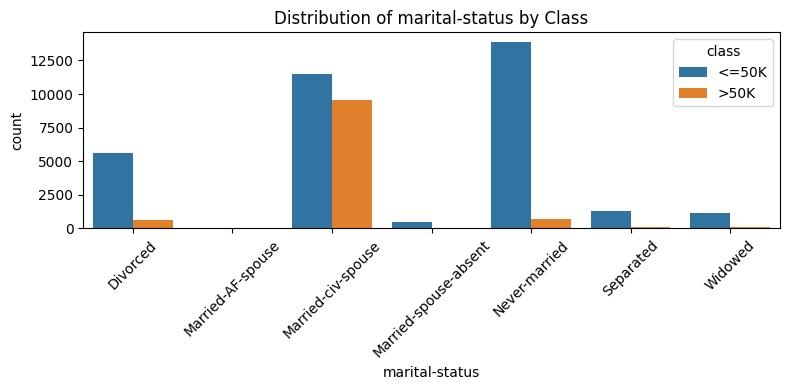

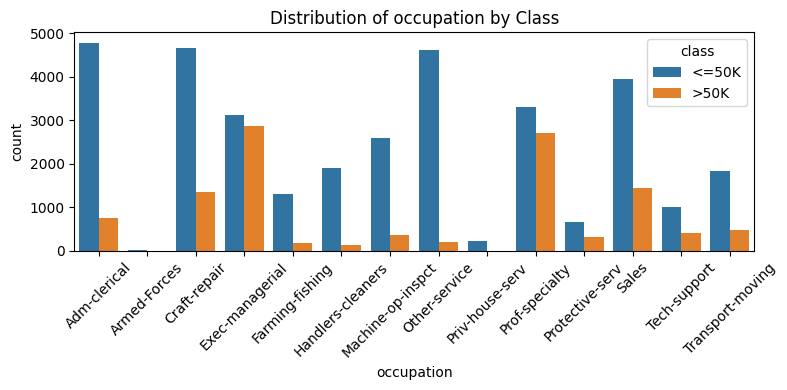

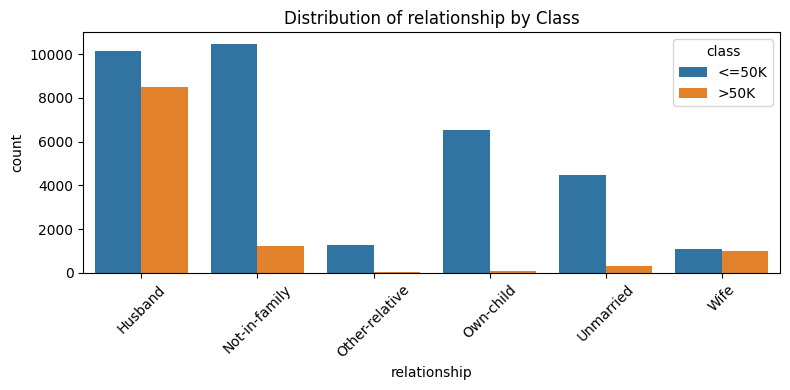

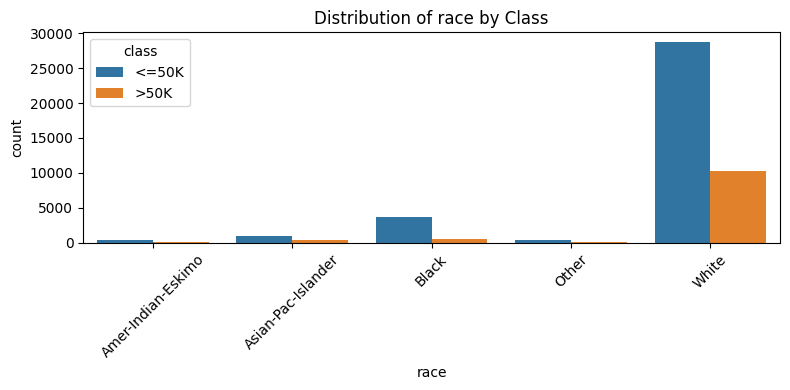

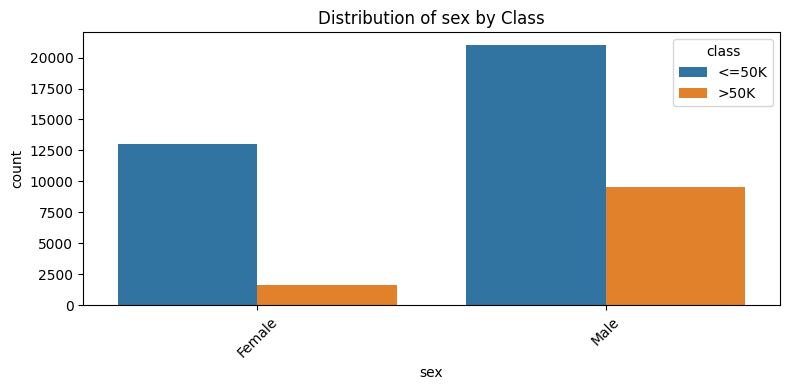

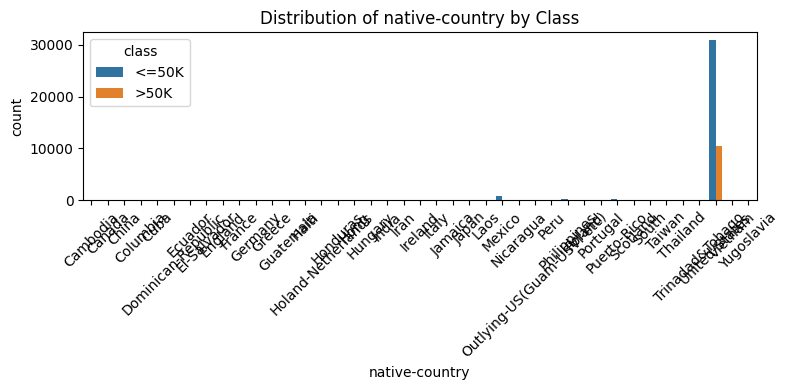

In [33]:
## 🔍 Categorical Feature Distributions
cat_cols = X.select_dtypes(include="category").columns.tolist()
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue="class")
    plt.title(f"Distribution of {col} by Class")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



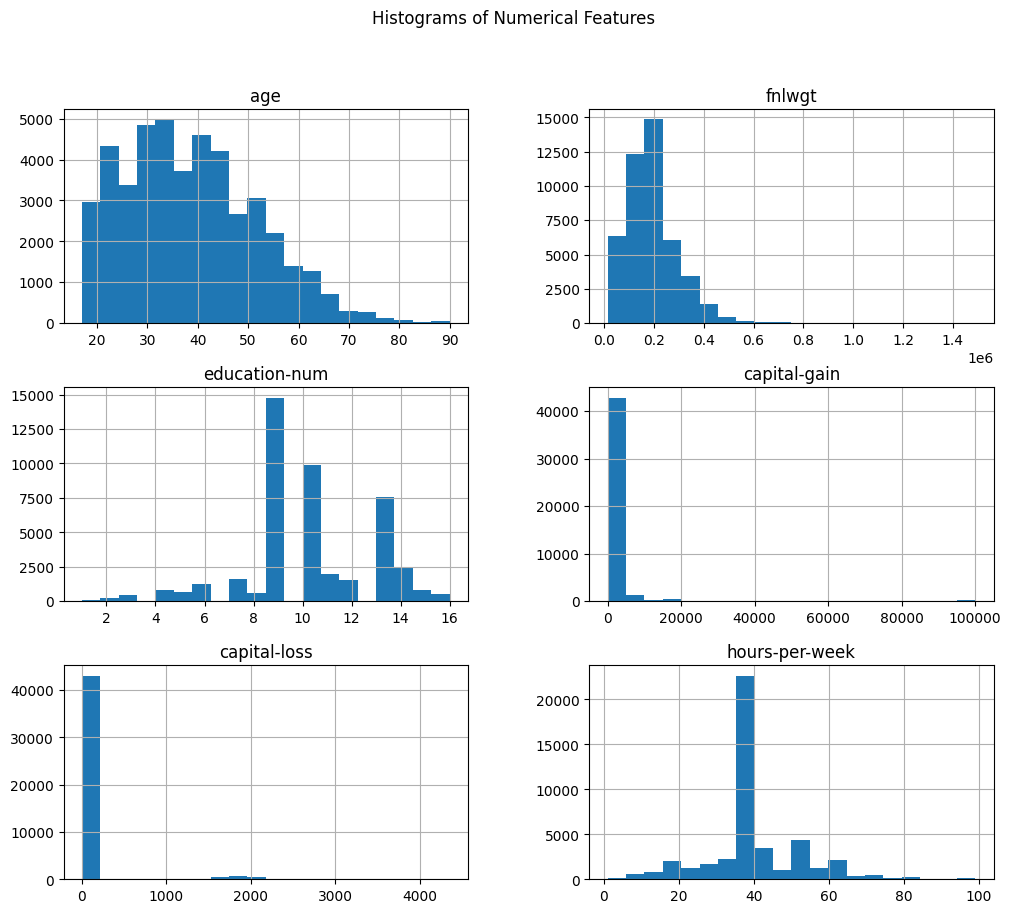

In [34]:
## 📈 Numerical Feature Distributions
num_cols = X.select_dtypes(include=["float64", "int64"]).columns.tolist()
df[num_cols].hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.show()



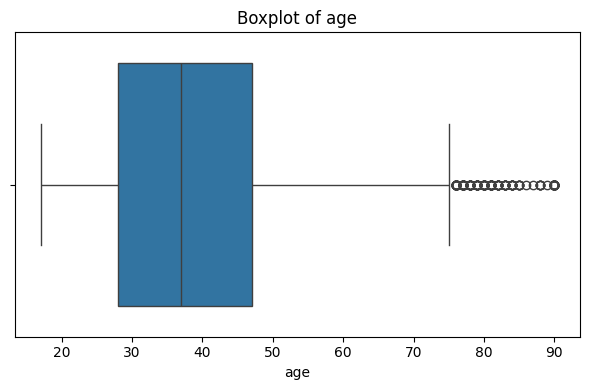

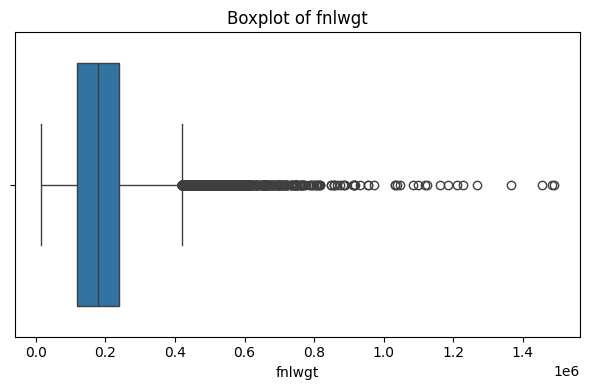

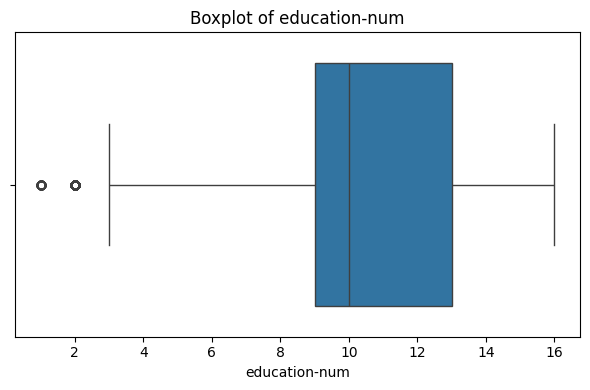

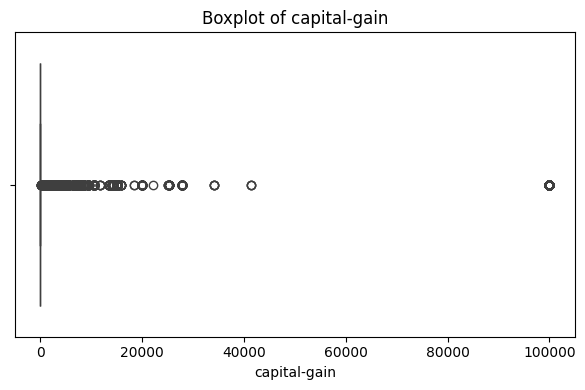

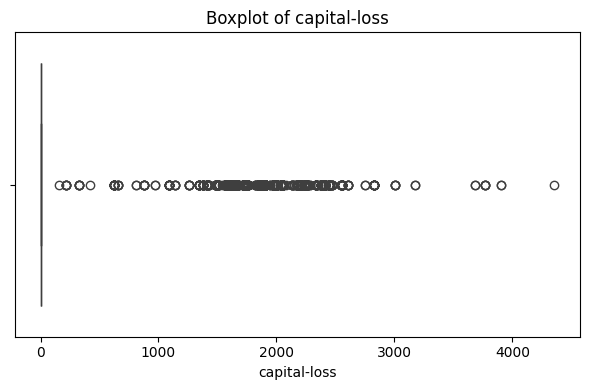

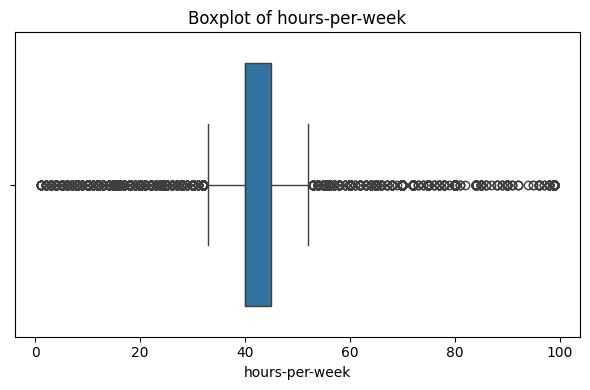

In [ ]:
## 📉 Boxplots for Outlier Detection
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()


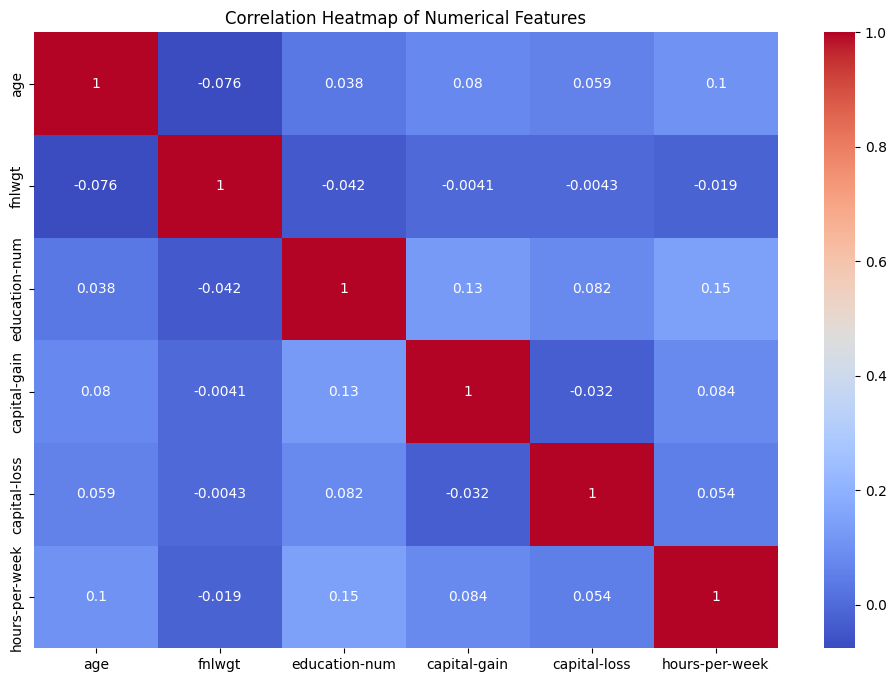

In [35]:

## 📊 Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [36]:
# ✅ Evaluate the Model
# Print classification report on test data
y_pred = model_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

       <=50K       0.94      0.79      0.86      6803
        >50K       0.57      0.84      0.68      2242

    accuracy                           0.81      9045
   macro avg       0.76      0.82      0.77      9045
weighted avg       0.85      0.81      0.82      9045



In [37]:
# 📌 Summary of Preprocessing Steps Applied:
# 1. Handling missing data (SimpleImputer, KNNImputer)
# 2. Encoding (OneHotEncoder)
# 3. Scaling (StandardScaler)
# 4. Balancing (SMOTE)
# 5. Integration using Pipeline and ColumnTransformer
# 6. Model: Logistic Regression
# 7. Evaluation: Classification Report


In [39]:
a=np.array([1,2,3,4,5,10])
b=np.array([5,6,7,8,9,10])


In [40]:
pd.DataFrame({'A': a, 'B': b})

,A,B
0,1,5
1,2,6
2,3,7
3,4,8
4,5,9
5,10,10
